In [1]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

In [2]:
import razor_data
import toy_data
import plotting
import gp
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

In [3]:
def get_data(box, btags, num_mr_bins, mr_max):
    binned_data = razor_data.get_binned_data_1d(
            num_mr_bins=num_mr_bins, mr_max=mr_max)
    test_data = binned_data[box][btags]
    return test_data

def fit_and_plot(box, btags, num_mr_bins, mr_max, kernel, 
                 steps=25, lr=0.001, verbose=False):
    data = get_data(box, btags , num_mr_bins, mr_max)
    U = data['u']
    Y = data['y']
    G = gp.PoissonLikelihoodGP(kernel, U, Y)
    G.fit(num_steps=steps, lr=lr, verbose=verbose)
    plotting.plot_hist_1d(data, G=G, verbose=verbose)
    plotting.plot_nsigma_1d(data, G, verbose=verbose)
    return G

Acceptance rate: 0.681


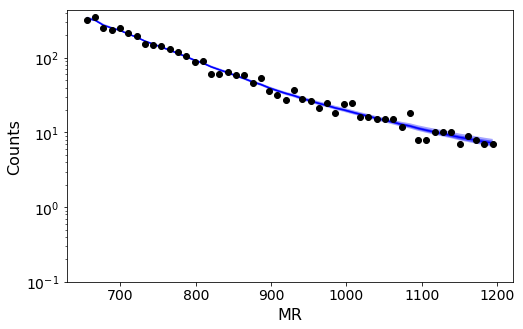

Acceptance rate: 0.679


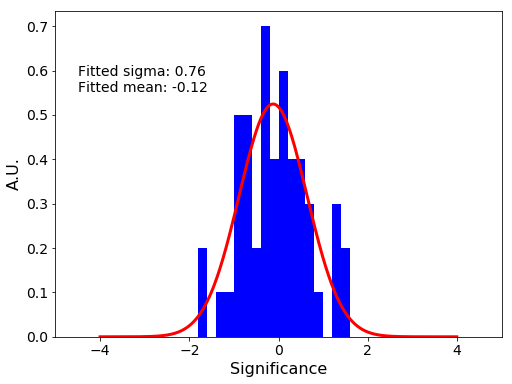

In [4]:
kernel = gp.SquaredExponentialKernel(200, 200)
G = fit_and_plot('MultiJet', 1, 50, 1200, kernel, 
                 steps=1000, lr=0.001)

Acceptance rate: 0.863


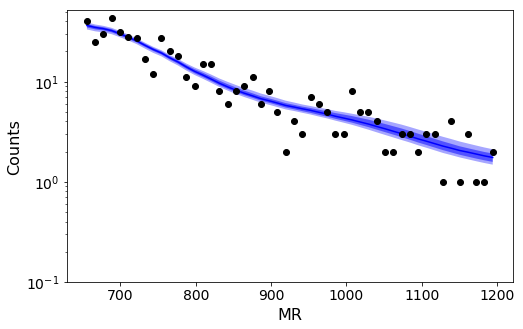

Acceptance rate: 0.873


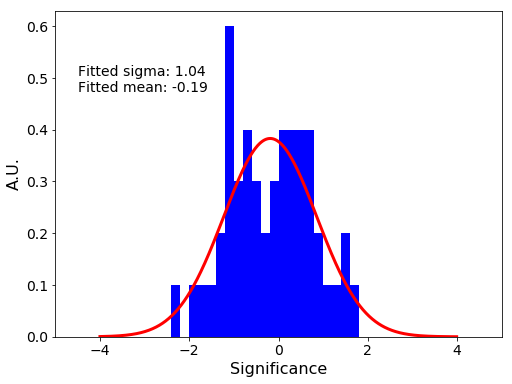

In [5]:
kernel = gp.SquaredExponentialKernel(200, 200)
G = fit_and_plot('SevenJet', 2, 50, 1200, kernel, 
                 steps=1000, lr=0.001)

Iteration 0 of 1000
Iteration 100 of 1000
Iteration 200 of 1000
Iteration 300 of 1000
Iteration 400 of 1000
Iteration 500 of 1000
Iteration 600 of 1000
Iteration 700 of 1000
Iteration 800 of 1000
Iteration 900 of 1000
Beginning HMC iterations with epsilon=0.0001, L_max=10
500: Accepted steps: 468, Rejected steps: 32 (0 bad)
1000: Accepted steps: 931, Rejected steps: 69 (0 bad)
1500: Accepted steps: 1398, Rejected steps: 102 (0 bad)
2000: Accepted steps: 1862, Rejected steps: 138 (0 bad)
2500: Accepted steps: 2335, Rejected steps: 165 (0 bad)
3000: Accepted steps: 2791, Rejected steps: 209 (0 bad)
3500: Accepted steps: 3266, Rejected steps: 234 (0 bad)
4000: Accepted steps: 3719, Rejected steps: 281 (0 bad)
4500: Accepted steps: 4193, Rejected steps: 307 (0 bad)
5000: Accepted steps: 4664, Rejected steps: 336 (0 bad)
5500: Accepted steps: 5120, Rejected steps: 380 (0 bad)
6000: Accepted steps: 5580, Rejected steps: 420 (0 bad)
6500: Accepted steps: 6051, Rejected steps: 449 (0 bad)
7000

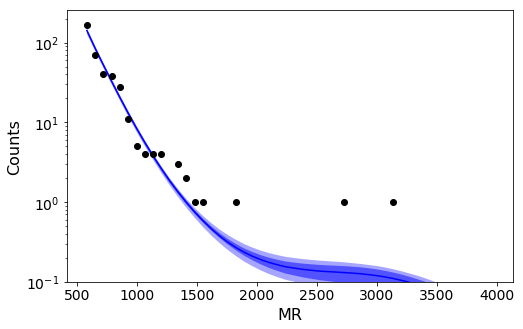

Beginning HMC iterations with epsilon=0.0001, L_max=10
500: Accepted steps: 457, Rejected steps: 43 (0 bad)
1000: Accepted steps: 929, Rejected steps: 71 (0 bad)
1500: Accepted steps: 1401, Rejected steps: 99 (0 bad)
2000: Accepted steps: 1833, Rejected steps: 167 (0 bad)
2500: Accepted steps: 2282, Rejected steps: 218 (0 bad)
3000: Accepted steps: 2730, Rejected steps: 270 (0 bad)
3500: Accepted steps: 3201, Rejected steps: 299 (0 bad)
4000: Accepted steps: 3666, Rejected steps: 334 (0 bad)
4500: Accepted steps: 4131, Rejected steps: 369 (0 bad)
5000: Accepted steps: 4598, Rejected steps: 402 (0 bad)
5500: Accepted steps: 5068, Rejected steps: 432 (0 bad)
6000: Accepted steps: 5539, Rejected steps: 461 (0 bad)
6500: Accepted steps: 5996, Rejected steps: 504 (0 bad)
7000: Accepted steps: 6474, Rejected steps: 526 (0 bad)
7500: Accepted steps: 6933, Rejected steps: 567 (0 bad)
8000: Accepted steps: 7404, Rejected steps: 596 (0 bad)
8500: Accepted steps: 7886, Rejected steps: 614 (0 bad)

70500: Accepted steps: 65226, Rejected steps: 5274 (0 bad)
71000: Accepted steps: 65684, Rejected steps: 5316 (0 bad)
71500: Accepted steps: 66160, Rejected steps: 5340 (0 bad)
Acceptance rate: 0.925
Error: at least one nsigma is infinite


In [13]:
kernel = gp.SquaredExponentialKernel(1200, 100)
G = fit_and_plot('LeptonMultiJet', 2, 50, 4000, kernel, 
                 steps=1000, lr=0.001, verbose=True)